In [53]:

#%matplotlib inline 

###########
#PDF PROCESSING FOR various INPUT 
# DEPENDING ON THE PDF_PROCESSING CLASS
#by Carl Schleussner, Climate Analytics
#carl.schleussner@climateanalytics.org
###########
# IMPORT AND CONFIG 
import numpy as np
import netCDF4 as net
import dimarray as da 
import sys
sys.path.append("./src/")
import itertools
import glob
import datetime
import pickle
import os
import pandas as pd
import matplotlib.pylab as plt 
from netCDF4 import Dataset,netcdftime,num2date

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8,6

os.chdir('/Users/peterpfleiderer/Documents/Projects/0p5_observed/pdf_processing-srex/')
try:
    import pdf_processing as pdf; reload(pdf)
except ImportError:
    raise ImportError(
        "cannot find PDF_Processing code")

###########
# Settings
###########

# PDF Method (currently defined: hist, python_silverman)
pdf_method='python_silverman'

# Set range for years for bootstrap sampling 
bs_range=[1958,2010]

# Variablelist
varin='TXX'

ref_period=[1960,1979]
target_periods=[[1991,2010],ref_period]
period_names=['Recent','ref']

timeaxis=np.arange(1958,2011)

# Input datasets
dataset='HadEx2'



In [54]:
read_in_data=da.read_nc('/Users/peterpfleiderer/Box Sync/0p5_observational_record/data/data_climdex/HadEx2/H2_'+varin+'_1901-2010_RegularGrid_global_3.75x2.5deg_LSmask.nc')['Ann']

input_data=da.DimArray(read_in_data[19580101:20100101,:,:], axes=[timeaxis, read_in_data.lat, read_in_data.lon],dims=['year', 'lat', 'lon'] )

# Mask for data availability (individual for each dataset)
varout=pdf.PDF_Processing(varin)
varout.mask_for_ref_period_data_coverage(input_data,ref_period,check_ref_period_only=False,target_periods=target_periods)

No of non-NAN grid cells in Mask over Ref period:  1095
No of non-NAN grid cells in Mask over Ref period and target period  [1991, 2010]  :  831
No of non-NAN grid cells in Mask over Ref period and target period  [1960, 1979]  :  831
no landmask used


Recent [1991, 2010]
ref [1960, 1979]


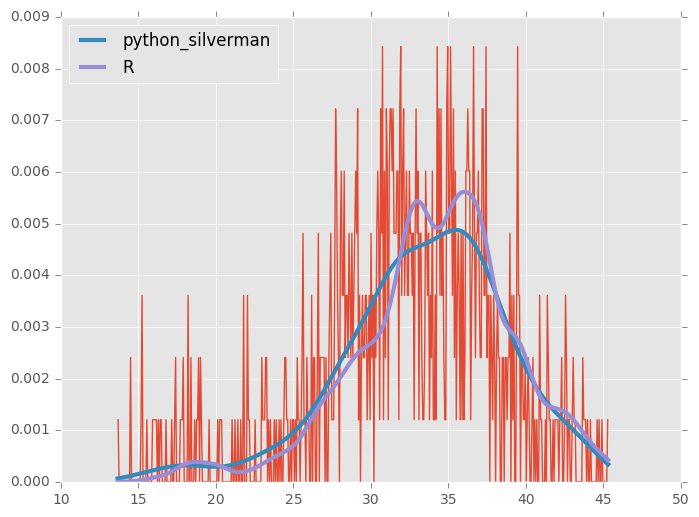

In [55]:
varout.derive_time_slices(ref_period,target_periods,period_names)
varout.derive_distributions()
            
dat=varout._distributions['global']['ref']
mdat = dat[np.isfinite(dat)]
range_scaling_factor=0.5


# bin_range used in pdf_processing
bin_range=[mdat.min(),mdat.max()]

histo=np.histogram(dat,512,range=bin_range)
plt.plot(histo[1][1:]-np.diff(histo[1],1)[0]/2,histo[0]/float(sum(histo[0])))

output,no_nans=varout.kernel_density_estimation(mdat,bin_range)
plt.plot(output[:,0],output[:,1],label='python_silverman',linewidth=3)

# as before
bw=(bin_range[1]-bin_range[0])/40
output,no_nans=varout.kernel_density_estimation(mdat,bin_range,method='R',bw=bw)
plt.plot(output[:,0],output[:,1],label='R',linewidth=3)

plt.legend(loc='best')
plt.show()